Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

Help Dictionaries & Lists

In [2]:
# List of all countries
countries_list = [
    'at',
    'be',
    'ch',
    'de',
    'dk',
    'es',
    'fr',
    'gb',
    'ie',
    'it',
    'lu',
    'nl',
    'no',
    'pt',
    'se'
]

# All week days
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
]

# All months
months = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'Spetember',
    'October',
    'November',
    'December'
]

Create full dataframe

In [3]:
frames = []
path = "data/{country}.csv"
for c in countries_list :
    temp_frame = pd.read_csv(path.format(country = c),
        sep=',', 
        header=0, 
        names=['start', 'end', c])
    temp_frame['Datetime'] = pd.to_datetime(temp_frame['start'])
    temp_frame = temp_frame.set_index('Datetime')
    temp_frame = temp_frame.drop(['start','end'], axis=1)
    temp_frame = temp_frame.resample('H').asfreq()
    frames.append(temp_frame)
    temp_frame.head()

nrj = pd.concat(frames,axis=1)
nrj['month'] = nrj.index.month
nrj['week_day'] = nrj.index.weekday 

In [4]:
nrj.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49681 entries, 2015-01-01 00:00:00+00:00 to 2020-09-01 00:00:00+00:00
Freq: H
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   at        48936 non-null  float64
 1   be        48936 non-null  float64
 2   ch        48936 non-null  float64
 3   de        49681 non-null  float64
 4   dk        48934 non-null  float64
 5   es        48902 non-null  float64
 6   fr        48870 non-null  float64
 7   gb        48907 non-null  float64
 8   ie        48574 non-null  float64
 9   it        48936 non-null  float64
 10  lu        49649 non-null  float64
 11  nl        48936 non-null  float64
 12  no        48819 non-null  float64
 13  pt        48936 non-null  float64
 14  se        48887 non-null  float64
 15  month     49681 non-null  int64  
 16  week_day  49681 non-null  int64  
dtypes: float64(15), int64(2)
memory usage: 7.8 MB


Plot energy consumpion per month

In [5]:
cols = countries_list + ['month']
nrj_month = pd.DataFrame(nrj[cols].groupby(['month']).sum()).reset_index()
nrj_month["month"] = months
nrj_month = nrj_month.set_index('month')
display(nrj_month)

,at,be,ch,de,dk,es,fr,gb,ie,it,lu,nl,no,pt,se
month,,,,,,,,,,,,,,,
January,35541635.0,48866010.0,34375590.0,265512738.0,18758591.0,135891135.0,307882729.0,176479256.0,15442287.0,151891759.0,2185647.0,61932090.0,85017562.0,28220100.0,87451556.0
February,32704965.0,44175862.0,30893605.0,244879234.0,16996635.0,123325459.0,271331973.0,163899076.0,14312812.0,141284089.0,1977772.0,55445499.0,74645425.0,24957128.0,78538542.0
March,33551366.0,45704711.0,31696021.0,257346770.0,17855060.0,126597949.0,264698944.0,171093895.0,14988126.0,143533446.0,2054355.0,57339015.0,78111608.0,25725350.0,79492898.0
April,28867426.0,41062386.0,27385579.0,230008543.0,15617638.0,113310924.0,215120327.0,147319990.0,13369213.0,126250555.0,1898014.0,50957725.0,65114778.0,23013924.0,66885877.0
May,28712213.0,41106387.0,27841714.0,233540661.0,15711808.0,116981340.0,201717257.0,144168387.0,13241604.0,135349376.0,1956395.0,51928520.0,59127376.0,23413672.0,60958592.0
June,28307163.0,40162021.0,27029488.0,229557400.0,15255198.0,121163634.0,193489085.0,136274704.0,12637761.0,144144742.0,1998017.0,51339205.0,52071155.0,23340193.0,55066044.0
July,28938502.0,40041520.0,27425043.0,237963506.0,14876736.0,135341713.0,203259484.0,139525050.0,12810014.0,166576717.0,2086392.0,53143407.0,50482073.0,25504711.0,52493487.0
August,24045501.0,33886005.0,21994086.0,234742343.0,13054379.0,107643015.0,158419761.0,117722969.0,10902012.0,118498136.0,1916361.0,43903817.0,43816030.0,20073666.0,46670371.0
Spetember,24210260.0,34161696.0,22434028.0,194238829.0,12889782.0,101527408.0,163971538.0,117155649.0,10863762.0,121032447.0,1736014.0,44087429.0,45674494.0,20069805.0,48699613.0


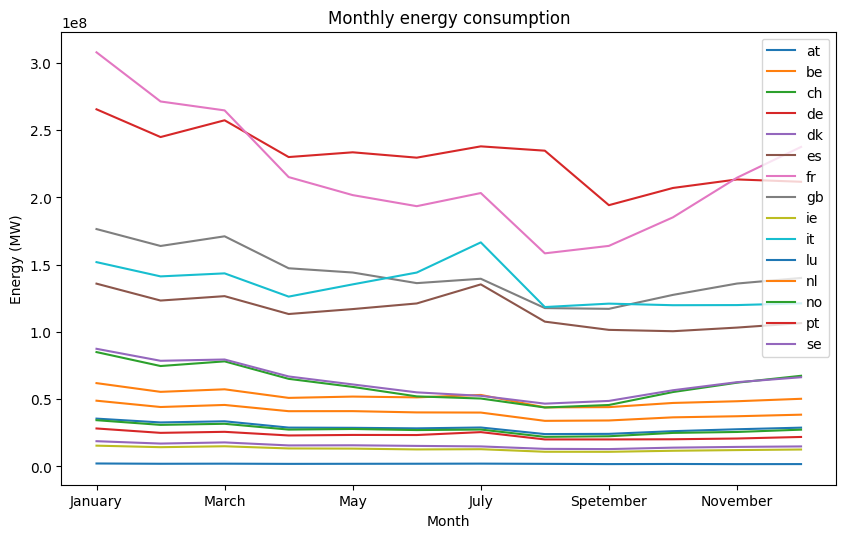

In [6]:
plt.figure(figsize=(10, 6), dpi=100)
nrj_month.plot(ax = plt.gca())

plt.title("Monthly energy consumption")
plt.xlabel("Month")
plt.ylabel("Energy (MW)")

plt.legend()
plt.show()

Plot energy consumption per weekday

In [7]:
cols = countries_list + ['week_day']
nrj_day = pd.DataFrame(nrj[cols].groupby(['week_day']).sum()).reset_index()
nrj_day['week_day'] = weekdays
nrj_day = nrj_day.set_index('week_day')
display(nrj_day)

,at,be,ch,de,dk,es,fr,gb,ie,it,lu,nl,no,pt,se
week_day,,,,,,,,,,,,,,,
Monday,51458161.0,69942452.0,48189591.0,408616416.0,27248606.0,203550169.0,379191772.0,249272869.0,22347629.0,235374108.0,3363523.0,90325382.0,107232651.0,40390339.0,112439892.0
Tuesday,52545421.0,71553795.0,48703358.0,419893379.0,27704207.0,208009105.0,388965580.0,253661428.0,22826404.0,246133341.0,3480616.0,92001270.0,108014631.0,41381289.0,112685166.0
Wednesday,52865832.0,71718819.0,48748837.0,421366645.0,27740181.0,208530562.0,390522832.0,253759287.0,22931280.0,248617222.0,3478293.0,92327013.0,107700615.0,41605619.0,112691128.0
Thursday,52557691.0,71784406.0,48863354.0,419252640.0,27705217.0,208472971.0,391098398.0,253866095.0,22881991.0,248820349.0,3505692.0,92484022.0,108412517.0,41683081.0,112530558.0
Friday,51468633.0,71048165.0,47706948.0,410842058.0,26742955.0,205753116.0,385998806.0,250962271.0,22688771.0,245269045.0,3478580.0,91589956.0,106756544.0,41289079.0,109990037.0
Saturday,44945398.0,64110892.0,43597232.0,353438627.0,23737471.0,185165348.0,349160552.0,230314330.0,21070086.0,204696703.0,3021768.0,80789641.0,101048695.0,36586445.0,100845806.0
Sunday,41698231.0,61278937.0,43138450.0,326418500.0,23477669.0,172602125.0,332358845.0,225450582.0,20187322.0,180710625.0,2753731.0,76495342.0,99840822.0,34236647.0,100650794.0


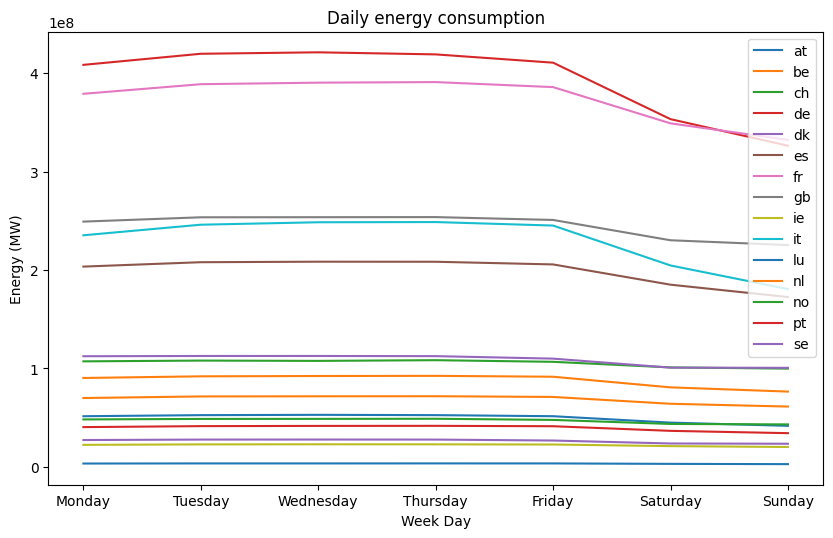

In [8]:
plt.figure(figsize=(10, 6), dpi=100)
nrj_day.plot(ax = plt.gca())

plt.title("Daily energy consumption")
plt.xlabel("Week Day")
plt.ylabel("Energy (MW)")

plt.legend()
plt.show()